Control valve design
====================

This is example 8.2 in Seborg, but worked a little differently to allow choice of $R$ and $C_{cv}$

In [1]:
import numpy
import scipy.optimize
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib inline

In [2]:
# Constant pump head
DeltaPa = 40
# Guess for q
q0 = 100

The MEB reduces to quadratic form:

$$ \Delta P_a = \Delta P_{hc} + \Delta P_{v} $$
$$ \Delta P_a - a_{hc}q^2 - a_{v}q^2 = 0$$


In [3]:
def MEBcoeffs(l, R, Ccv, characteristic='eqperc'):
    ahc = 30/200**2
    if characteristic == 'linear':
        fl = l
    elif characteristic == 'eqperc':
        fl = R**(l - 1)
    av = (1/(Ccv*fl))**2
    
    return [-ahc - av, 0, DeltaPa]

In [4]:
def positive(x):
    return x[x>0][0]

In [5]:
ls = numpy.linspace(0.01, 1)

In [6]:
def curve(R, Ccv, characteristic):
    qs = [positive(numpy.roots(MEBcoeffs(l, R, Ccv, characteristic))) for l in ls]
    plt.plot(ls, qs)
    plt.plot([0, 1], [0, max(qs)])
    plt.xlabel('Valve lift (l)')
    plt.ylabel('q')
    plt.ylim([0, 250])

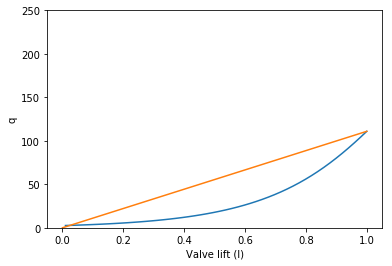

In [7]:
curve(50, 20, 'eqperc')

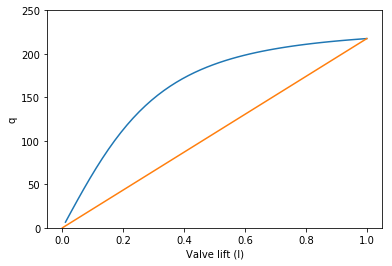

<function __main__.curve>

In [8]:
interact(curve, 
         R=(5., 100.), 
         Ccv=(5., 200.), 
         characteristic=['linear', 'eqperc'])